<a href="https://colab.research.google.com/github/samikris/physicsprojects/blob/main/Project4_LinearFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"


Mounted at /content/drive


In [ ]:
filename = 'MN_data.txt'
file_path = "/content/drive/My Drive/Python4Physics/" + filename

In [ ]:
filename = 'const_data.txt'
file_path = "/content/drive/My Drive/Python4Physics/" + filename

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

Attempting to Plot a Horizontal Line Across Data Points (fail)

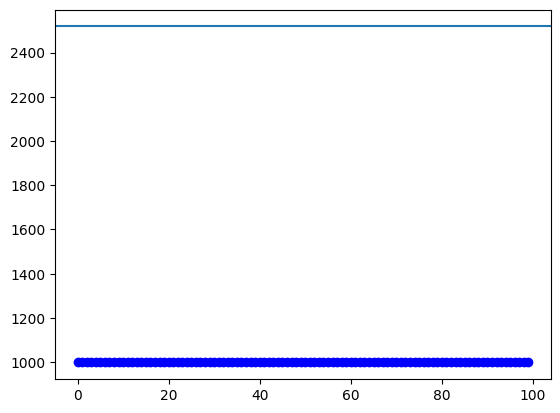

In [ ]:
const_data = np.loadtxt(file_path)
Xs, Ys, sigs = const_data.T

def cost(c):
  return np.sum(((Ys-c/sigs)**2)) #what formula

c_guess = np.mean(Ys)
result = optimize.minimize(cost, c_guess, method = 'nelder-mead')
c = result.x[0]

plt.scatter(Xs, Ys, label='Data points', color='blue')
plt.axhline(y=c)


Attempting to Fit a Line Across the Data

[173. 249. 265. 293. 293. 304. 324. 333. 343. 349. 356. 399. 407. 423.
 440. 496. 498. 577. 565. 543. 597. 688. 758. 680.]


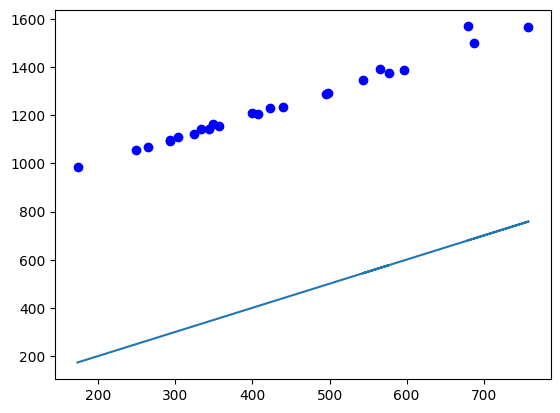

In [ ]:
const_data = np.loadtxt(file_path) #loading the data and separating it
mps, Mns, sigs = const_data.T #transposes the data, unpacks it into following variables

def Mns_guess(mps, a = 1, b = 1): #function that plots a line mx + b based on parameters a and b and array mps
  return a + b * mps

def cost(consts): #function to calculate the cost, input is tuple
  a, b = consts #defines the parameters
  return np.sum(((Mns - Mns_guess(mps, a = 1, b = 1))/sigs) ** 2) #squared error of the set, weighted by the sigs

consts_guess = (1,1) #initial guess tuple parameters
consts = optimize.minimize(cost, consts_guess, method = 'nelder-mead') #uses scipy & nelder-mead function to optimize the parameters a and b --> direct search
a, b = consts.x

#mps = np.linspace(100, 800, 100) #
plt.plot(mps, Mns_guess(mps, a =a, b=b))
plt.scatter(mps, Mns, label='Data points', color='blue')


#what is this doing? fitting a line through the MN_data?
print(mps)